In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
# Load the dataset
df = pd.read_csv('/home/user01/Data/roads/NNNPedestrian Accidents_translated-Yasir_Laptop.csv')
df.columns = df.columns.str.strip()
# Replace unknowns represented by 9 with NaN
df.replace(9,pd.NA, inplace=True) # pd.NA

def map_columns_to_numeric(df, columns_dict):
    for new_col, col_list in columns_dict.items():
        # Check if all columns in the row are zero, and set to pd.NA
        mask_all_zeros = df[col_list].sum(axis=1) == 0
        df[new_col] = df[col_list].idxmax(axis=1).map({col: i for i, col in enumerate(col_list)})
        df.loc[mask_all_zeros, new_col] = pd.NA
    return df

columns_dict = {

        'Season': ['Summer', 'Spring', 'Autumn', 'Winter'],
        'Ped_Involved': ['Ped_Involved_4',  'Ped_Involved_3', 'Ped_Involved_2', 'Ped_Involved_1'],
        'Ped_Age': ['Pedestrian age_Below18', 'Pedestrian age_18orAbove'],
        'Ped_Gender': ['PedGend_M/F', 'PedGend_M', 'PedGend_F'],
        'VehicleInvolved': ['VehicleInvolved_Tram', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles',
                                    'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Car'],
        'DriverAge': ['DriverAge_Below18', 'DriverAge_18orabove'],
        'DriverGender': ['DriverGender_F', 'DriverGender_M'],
        'Ped_Behv': ['Ped_Behv_Entering to Car', 'Ped_Behv_Bus Entry/Exit', 'Ped_Behv_at the Side walk',
                            'Ped_Behv_at the road',  'Ped_Behv_Crossing The Street'],
        'NatureofIncident': ['NatureofIncident_Pedestrian Involved in another accidents', 'NatureofIncident_Pedestrian fell down',
                                    'NatureofIncident_Opponent hit the pedestrian while driving backside', 'NatureofIncident_Opponent hit the pedestrian',],
        'AccidentDynamics': [ 'AccidentDynamics_Driver / Infrastructural', 'AccidentDynamics_Environmental',
                                    'AccidentDynamics_Infrastructural', 'AccidentDynamics_Driver / Pedestrian',
                                    'AccidentDynamics_Pedestrian', 'AccidentDynamics_Driver'],
        'CrossWalk': ['Accidents happened at the crosswalk_Yes', 'Yes - there is pedestrian specific signs/signals',
                            'Accidents happened at the crosswalk_No'],
        'RoadFeature': ['RoadFeature_Roundabout','RoadFeature_Curved section of road','RoadFeature_Traffic light-controlled intersection',
                                'RoadFeature_Intersection',  'RoadFeature_Straight section of road'],
        'RoadSurface': ['RoadSurface_Paved with cobblestones', 'RoadSurface_Unpaved Road', 'RoadSurface_Asphalt'],
        'RoadType': ['RoadType_single or dual carriageway with service road', 'RoadType_Dual Carriageway', 
                            'RoadType_One way road-way', 'RoadType_Two way road-way'],
        'RoadSurf': ['RoadSurf_Wet', 'RoadSurf_Dry'],
        'Weather': ['Weather_Rainy', 'Weather_Cloudy', 'Weather_Clear'],
        'Lighting': ['Lighting_In Sufficient', 'Lighting_Sufficient'],
        'TrafficLights': ['TraffLights_Functional', 'TraffLights_Not present'],
        'Visibility': ['VisbilityCond_In Sufficient', 'VisbilityCond_Good'],
        'TrafficCondition': ['TraffCondition_Intense', 'TraffCondition_Normal'],
        'DayofWeek': ['Weekends', 'Weekdays']

}

# Apply the function to your DataFrame
df = map_columns_to_numeric(df, columns_dict)



# Drop the original one-hot encoded columns
df.drop(columns=['Winter', 'Spring', 'Summer', 'Autumn',
                'Ped_Involved_1', 'Ped_Involved_2', 'Ped_Involved_3', 'Ped_Involved_4',
                'Pedestrian age_18orAbove', 'Pedestrian age_Below18',
                'PedGend_M', 'PedGend_F', 'PedGend_M/F',
                'VehicleInvolved_Car', 'VehcileInvolved_Two Wheeler', 'VehicleInvolved_Heavy Vehicles', 'VehicleInvolved_Accident that did not involve other vehicles', 'VehicleInvolved_Tram',
                'DriverAge_18orabove', 'DriverAge_Below18',
                'DriverGender_M', 'DriverGender_F',
                'Ped_Behv_at the road', 'Ped_Behv_at the Side walk', 'Ped_Behv_Crossing The Street', 'Ped_Behv_Bus Entry/Exit', 'Ped_Behv_Entering to Car',
                'NatureofIncident_Opponent hit the pedestrian', 'NatureofIncident_Opponent hit the pedestrian while driving backside', 'NatureofIncident_Pedestrian fell down', 'NatureofIncident_Pedestrian Involved in another accidents',
                'AccidentDynamics_Driver', 'AccidentDynamics_Pedestrian', 'AccidentDynamics_Driver / Pedestrian', 'AccidentDynamics_Driver / Infrastructural', 'AccidentDynamics_Environmental',
                'AccidentDynamics_Infrastructural',
                'Accidents happened at the crosswalk_Yes', 'Accidents happened at the crosswalk_No',
                'RoadFeature_Curved section of road', 'RoadFeature_Intersection', 'RoadFeature_Roundabout', 'RoadFeature_Straight section of road',
                'RoadFeature_Traffic light-controlled intersection',
                'RoadSurface_Asphalt', 'RoadSurface_Paved with cobblestones', 'RoadSurface_Unpaved Road',
                'RoadType_One way road-way', 'RoadType_Two way road-way', 'RoadType_Dual Carriageway', 'RoadType_single or dual carriageway with service road',
                'RoadSurf_Dry', 'RoadSurf_Wet',
                'Weather_Clear', 'Weather_Cloudy', 'Weather_Rainy',
                'Lighting_Sufficient', 'Lighting_In Sufficient',
                'TraffLights_Functional', 'TraffLights_Not present',
                'VisbilityCond_Good', 'VisbilityCond_In Sufficient',
                'TraffCondition_Normal', 'TraffCondition_Intense',
                'Yes - there is pedestrian specific signs/signals',
                'Weekdays', 'Weekends'], inplace=True)
# replace 0 with day and 1 with night in Day/Night Time column
df['Day/Night Time'] = df['Day/Night Time'].replace({1: 'Day', 0: 'Night'})
# List of categorical features
categorical_features = list(df.columns) # list of all columns
del [categorical_features[1]] # remove the target column Injury Severity
print(categorical_features)





['Day/Night Time', 'Season', 'Ped_Involved', 'Ped_Age', 'Ped_Gender', 'VehicleInvolved', 'DriverAge', 'DriverGender', 'Ped_Behv', 'NatureofIncident', 'AccidentDynamics', 'CrossWalk', 'RoadFeature', 'RoadSurface', 'RoadType', 'RoadSurf', 'Weather', 'Lighting', 'TrafficLights', 'Visibility', 'TrafficCondition', 'DayofWeek']


/tmp/ipykernel_83029/2991794395.py:15: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[new_col] = df[col_list].idxmax(axis=1).map({col: i for i, col in enumerate(col_list)})
/tmp/ipykernel_83029/2991794395.py:15: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[new_col] = df[col_list].idxmax(axis=1).map({col: i for i, col in enumerate(col_list)})
/tmp/ipykernel_83029/2991794395.py:15: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[new_col] = df[col_list].idxmax(axis=1).map({col: i for i, col in enumerate(col_list)})
/tmp/ipykernel_83029/2991794395.py:15: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False

In [2]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        #List of column names in the DataFrame that should be encoded
        self.col = col
        #Dictionary storing a LabelEncoder for each column
        self.le_dic = {}
        for el in self.col:
            self.le_dic[el] = LabelEncoder()

    def fit(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            self.le_dic[el].fit(a)
        return self

    def transform(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            #Store an ndarray of the current column
            b = x[el].to_numpy()
            #Replace the elements in the ndarray that are not 'NaN'
            #using the transformer
            b[b!='NaN'] = self.le_dic[el].transform(a)
            #Overwrite the column in the DataFrame
            x[el]=b
        #return the transformed DataFrame
        return x

In [3]:

cle = CustomLabelEncoder(categorical_features)
cle.fit(df)
df = cle.transform(df)

df.replace('NaN', np.nan, inplace=True) # pd.NA

/tmp/ipykernel_83029/3995369003.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('NaN', np.nan, inplace=True) # pd.NA


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer, IterativeImputer

'''
Iterative Imputer
'''
iter_imputer = IterativeImputer(missing_values=np.nan, random_state=42)
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df), columns=df.columns)
'''
KNN Imputer
'''
# knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
# df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
'''
Simple Imputer
'''
# simple_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
# df_imputed = pd.DataFrame(simple_imputer.fit_transform(df), columns=df.columns)

'\nSimple Imputer\n'

In [16]:
# Separate features and target
X = df_imputed.drop(columns=['Injury_Severity'])
# X = X.round().astype(int)
y = df_imputed['Injury_Severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [17]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

best_params = {'depth': 10, 'iterations': 1000, 'l2_leaf_reg': 2, 'learning_rate': 0.01}

# Train the model with the best parameters
best_catboost_model = CatBoostClassifier(**best_params, eval_metric='Logloss', verbose=False)
best_catboost_model.fit(X_train_res, y_train_res, eval_set=(X_test, y_test), plot=True)

# Retrieve and plot the loss
results = best_catboost_model.get_evals_result()
# 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [18]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train the model with the best parameters
best_catboost_model = CatBoostClassifier(**best_params, verbose=False)
best_catboost_model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = best_catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"AUC: {auc}")


Accuracy: 0.9375
F1 Score (Micro): 0.9375
F1 Score (Macro): 0.7474173423252759
AUC: 0.7033688382462224


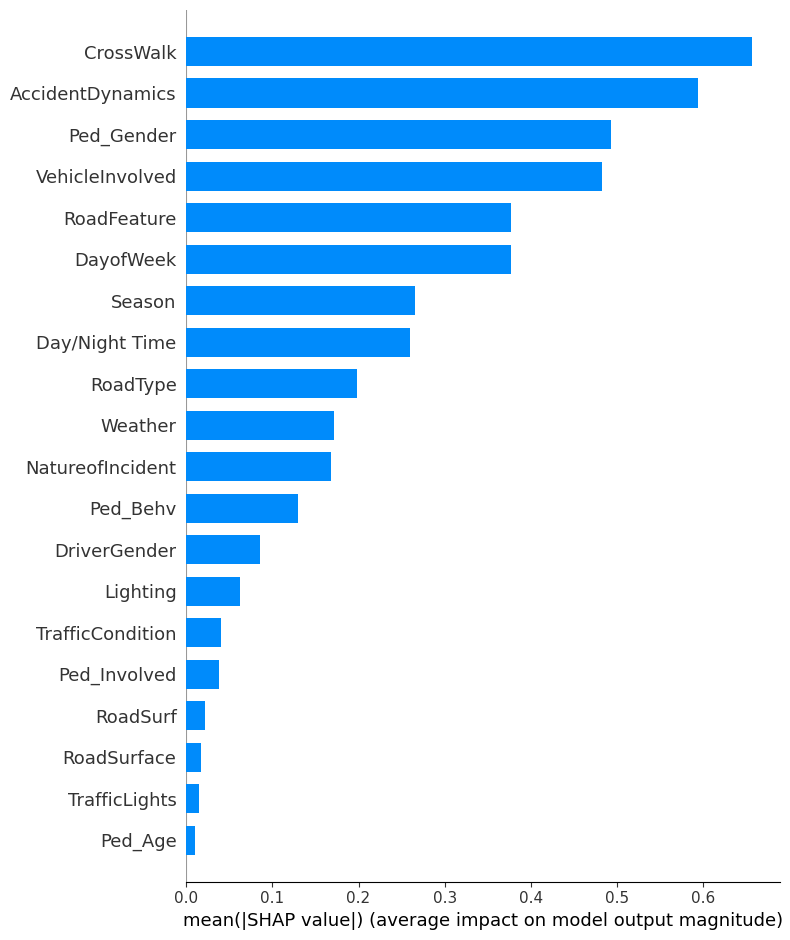

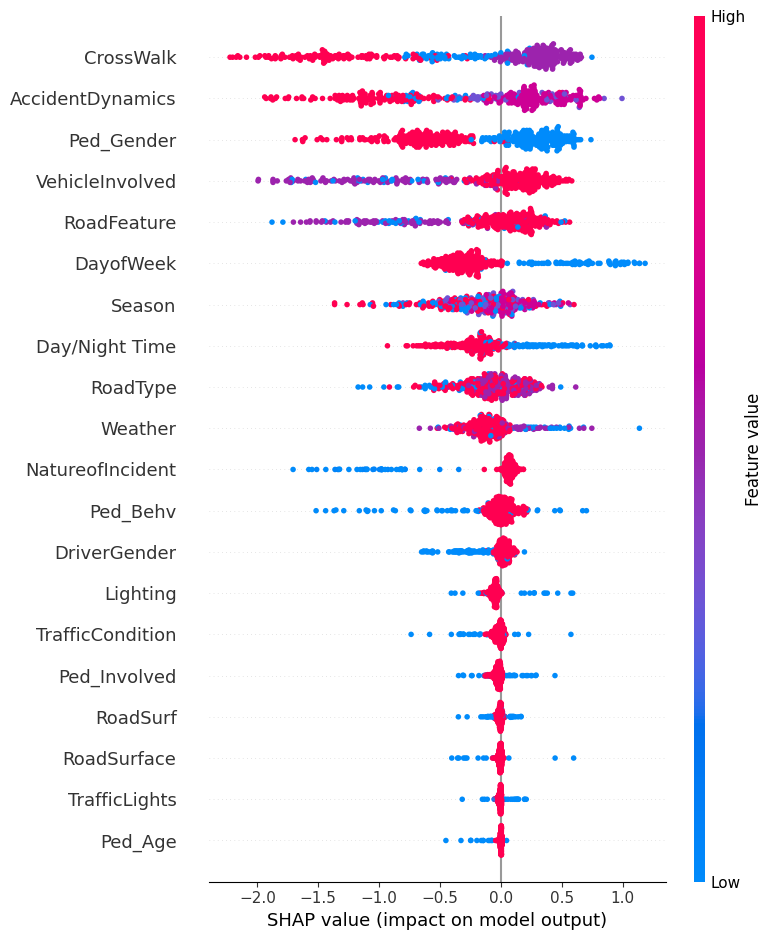

In [13]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
